In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

D:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# # Load the data
# dataset = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_sine_sweep9_voltage.csv')
# dataset2= pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/sine_sweep9.csv')
# #X, y = dataset.iloc[:, 0:4], dataset2.iloc[:, 1]
# X = dataset.iloc[:, 0:4].values
# #length_x = dataset2.iloc[:, 0].values
# y = dataset2.iloc[:, 1].values

In [3]:
dataset1_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test1_voltage.csv')
dataset1_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test2_voltage.csv')
dataset1_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test3_voltage.csv')
dataset2_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test1.csv')
dataset2_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test2.csv')
dataset2_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test3.csv')

X = np.vstack((dataset1_1,dataset1_2,dataset1_3))
y = np.vstack((dataset2_1,dataset2_2,dataset2_3))
y = y[:, 1]
#X = dataset.iloc[:, 0:4].values
#y = dataset2.iloc[:, 1].values
#length_x = dataset2.iloc[:, 0].values
#lengt=dataset1.iloc[:, -1].values
X.shape

(52012, 4)

In [4]:
X.shape

(52012, 4)

In [5]:
# Splitting
#X_train, X_test, length_x_train, length_x_test = train_test_split(X, length_x, test_size = 0.2, random_state = 1234,shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234,shuffle = True)

# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
# regressor = xgb.XGBRegressor(
#     #loss = "squared_error",
#     n_estimators=10,
#     reg_lambda=1,
#     reg_alpha=5,
#     gamma=1,
#     max_depth=6,
#     eta=0.3, 
#     subsample=0.8, 
#     colsample_bytree=1
# )

regressor = xgb.XGBRegressor(
        n_estimators=100,
        #reg_lambda=1,
        gamma=0,
        max_depth=10,
        alpha= 0.0001,
)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [6]:
y_pred2 = regressor.predict(X)

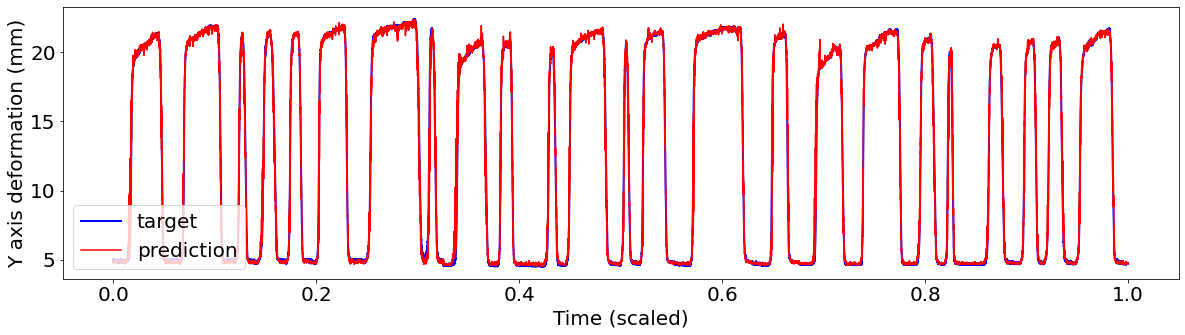

In [7]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (20,5)
x1=np.linspace(0, 1.0, num=len(y_pred2))
plt.plot(x1,y,'-b',linewidth=2)
plt.plot(x1,y_pred2,'-r')
#plt.ylim(-15,45)
#plt.ylim(45,95)
plt.legend(['target','prediction'],loc ="lower left")
#plt.xlim(0.6, 1.0)
#plt.xlim(5, 120)
#plt.ylim(63, 69)
plt.xlabel("Time (scaled)")
plt.ylabel("Y axis deformation (mm)")
#plt.title('SMA actuator position with random forest regression')
plt.show()

In [8]:
def mean_abs_error(y_true, y_predict):
  return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true)).mean()
  #return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true))
mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [9]:
#error for y_pred2
y_pred3 = regressor.predict(X_test)
error=mean_abs_error(y_test, y_pred3)
print(error)
#plt.plot(error)

0.031309031181528564


In [10]:
from scipy.io import savemat
#savemat('sine_volt.mat', {'sine_volt': X})
savemat('XGBoost_sine_x.mat', {'XGBoost_sine_x': np.transpose(y)})
savemat('XGBoost_sine_xpred.mat', {'XGBoost_sine_x': np.transpose(y_pred2)})

In [11]:
# y_pred3 = regressor.predict(X_test)
# normDiffTest=np.zeros(len(X_test))
# for i in range(len(X_test)):
#   diff = abs(y_pred3[i]-y_test[i])
#   #normDiffTest[i] = diff/(X_test[i][0])
#   normDiffTest[i] = diff/(length_x_test[i])
#   #result[i] = np.where(X == X_train[i])
#   #y_train[i]

# normDiffTestAvg=np.mean(normDiffTest)
# print(normDiffTestAvg)

In [12]:
# df = pd.DataFrame({"true" : y, "prediction" : y_pred2, "error" : normDiffTestAvg})
# df.to_csv("XGBoost_SMA_y.csv", index=False)

In [13]:
###### K-Nearest Neighbour(KNN) Regression in Python #######

# from sklearn.neighbors import KNeighborsRegressor
# RegModel = KNeighborsRegressor(n_neighbors=2)

# #Printing all the parameters of KNN
# print(RegModel)

# #Creating the model on Training Data
# KNN=RegModel.fit(X_test,y_test)
# prediction=KNN.predict(X_test)

In [14]:
# y_predKNN = regressor.predict(X)
# # RMSE Computation
# rmse = np.sqrt(MSE(y, y_predKNN))
# print("RMSE : % f" %(rmse))

# #Measuring Goodness of fit in Training data
# from sklearn import metrics
# print('R2 Value:',metrics.r2_score(y_test, KNN.predict(X_test)))

# #Measuring accuracy on Testing Data
# print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

In [15]:
# y_predKNN2=regressor.predict(X)
# #y_pred3=regressor.predict(X)

In [16]:
# plt.plot(y)
# plt.plot(y_predKNN2)
# plt.xlabel('samples')
# plt.ylabel('Y axis displacement')
# plt.xlim(len(y)-5000, len(y))